In [6]:
import pandas as pd
import numpy as np

In [7]:
df1=pd.read_csv("books.csv",error_bad_lines=False)
df2=pd.read_csv("books2.csv",error_bad_lines=False)
ratings=pd.read_csv("Ratings.csv",error_bad_lines=False)
user=pd.read_csv("Users.csv",error_bad_lines=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\615020521.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1=pd.read_csv("books.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\615020521.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2=pd.read_csv("books2.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\615020521.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("books2.csv",error_bad_lines=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\615020521.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings=pd.read_csv("Ratings.csv

In [8]:
df1.shape
dftest=df1[df1['numRatings']>=500].sort_values('rating',ascending=False).head(15000)
# dftest.head(10)

In [9]:
df1=df1[df1['numRatings']>=500]

df1=df1[df1['rating']>=3.5].sort_values('rating',ascending=False).head(20000)
df1.shape



(20000, 25)

In [10]:
df1.head(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
2488,50926309-100-bible-facts-about-jesus,100 Bible Facts About Jesus: The Exciting way ...,NaN,Ginger Baum,4.96,"To your avail, I have this fascinating book he...",NaN,B07XGFCBJX,[],[],...,NaN,[],504,"['497', '2', '2', '0', '3']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,1491,15,NaN
43462,33649894-keeper-of-the-lost-cities-set,Keeper of the Lost Cities Set,Keeper of the Lost Cities #1-5,Shannon Messenger (Goodreads Author),4.88,"From Book 1: In this riveting debut, a telepat...",English,B01FZFVDJG,['Fantasy'],[],...,NaN,[],694,"['624', '60', '7', '2', '1']",100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,74,1,NaN
7737,24885561-keeper-of-the-lost-cities-exile-everb...,Keeper of the Lost Cities / Exile / Everblaze,Keeper of the Lost Cities #1-3,Shannon Messenger (Goodreads Author),4.86,A telepathic girl is the key to an unknown wor...,NaN,9781481451123,"['Fantasy', 'Middle Grade']",[],...,NaN,[],861,"['777', '60', '15', '3', '6']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,342,4,23.98
256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,Calvin and Hobbes,Bill Watterson,4.82,[ \n Box Set\n | Book One | Book Two | Book T...,English,9780740748479,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...","['Calvin', 'Hobbes']",...,NaN,[],34893,"['30247', '3561', '782', '167', '136']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,50709,632,110.67
32605,26112217-wings-of-fire-boxset-books-1-5,"Wings of Fire Boxset, Books 1-5",Wings of Fire #1-5,"Tui T. Sutherland, Bea Reiter (Translator)",4.81,The New York Times bestselling Wings of Fire s...,English,9780545855723,"['Fantasy', 'Dragons', 'Young Adult', 'Childre...",[],...,08/01/15,[],600,"['527', '50', '11', '6', '6']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,93,1,29.87


In [11]:
books_with_genre=df1.drop([ 'characters','language','description','coverImg','series','likedPercent','awards',"firstPublishDate","price","publishDate","edition","bbeScore","bbeVotes","setting","pages","bookFormat","ratingsByStars"],axis=1)

In [12]:
books_with_genre.columns

Index(['bookId', 'title', 'author', 'rating', 'isbn', 'genres', 'publisher',
       'numRatings'],
      dtype='object')

In [13]:

# df4=df2.rename({'ISBN':'isbn','Book-Title':'title'}, axis=1)

# df4.columns
# df2=df2.dropna()



In [14]:
books_with_genre=books_with_genre.dropna()
books_with_genre.isnull().sum()
books_with_genre.shape

(18908, 8)

In [15]:
books_with_genre=books_with_genre.drop_duplicates()
books_with_genre.duplicated().sum()

0

In [16]:
from ast import literal_eval

from numpy import split


# data=books_with_genre['genres'].apply(lambda x:[literal_eval(x)])
# data
def convert(obj):
    return literal_eval(obj)

def convertToList(obj):
    return obj.split(',')


In [17]:
books_with_genre.iloc[0].publisher


'Aladdin'

In [18]:

data=books_with_genre.iloc[6].author
data=data.split(',')
data

['Brandon Sanderson (Goodreads Author)']

In [19]:
# books_with_genre['genres'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['author']=books_with_genre['author'].apply(convertToList)
books_with_genre['publisher']=books_with_genre['publisher'].apply(convertToList)
books_with_genre['genres']=books_with_genre['genres'].apply(convert)

In [20]:
books_with_genre['genres']=books_with_genre['genres'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['author']=books_with_genre['author'].apply(lambda x:[i.replace(" ","") for i in x])
books_with_genre['publisher']=books_with_genre['publisher'].apply(lambda x:[i.replace(" ","") for i in x])

In [21]:
books_with_genre.iloc[6].author

['BrandonSanderson(GoodreadsAuthor)']

In [22]:
books_with_genre.iloc[6].publisher


['Gollancz']

In [23]:
books_with_genre['tag']=books_with_genre['author']+books_with_genre['genres']+books_with_genre['publisher']

In [24]:
# books_with_genre.iloc[1].tag

In [25]:
books_with_genre.head(2)

,bookId,title,author,rating,isbn,genres,publisher,numRatings,tag
43462,33649894-keeper-of-the-lost-cities-set,Keeper of the Lost Cities Set,[ShannonMessenger(GoodreadsAuthor)],4.88,B01FZFVDJG,[Fantasy],[Aladdin],694,"[ShannonMessenger(GoodreadsAuthor), Fantasy, A..."
7737,24885561-keeper-of-the-lost-cities-exile-everb...,Keeper of the Lost Cities / Exile / Everblaze,[ShannonMessenger(GoodreadsAuthor)],4.86,9781481451123,"[Fantasy, MiddleGrade]",[Aladdin],861,"[ShannonMessenger(GoodreadsAuthor), Fantasy, M..."


In [26]:
books_with_genre.columns

Index(['bookId', 'title', 'author', 'rating', 'isbn', 'genres', 'publisher',
       'numRatings', 'tag'],
      dtype='object')

In [27]:
new_df=books_with_genre[['bookId','title','isbn','rating','numRatings','tag']]

In [28]:
new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\4079141722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))


In [29]:
new_df.iloc[0].tag

'ShannonMessenger(GoodreadsAuthor) Fantasy Aladdin'

In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [31]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i)) 
    return " ".join(y)

In [32]:
new_df['tag']=new_df['tag'].apply(stem)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\599176683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(stem)


### Data Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df1.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

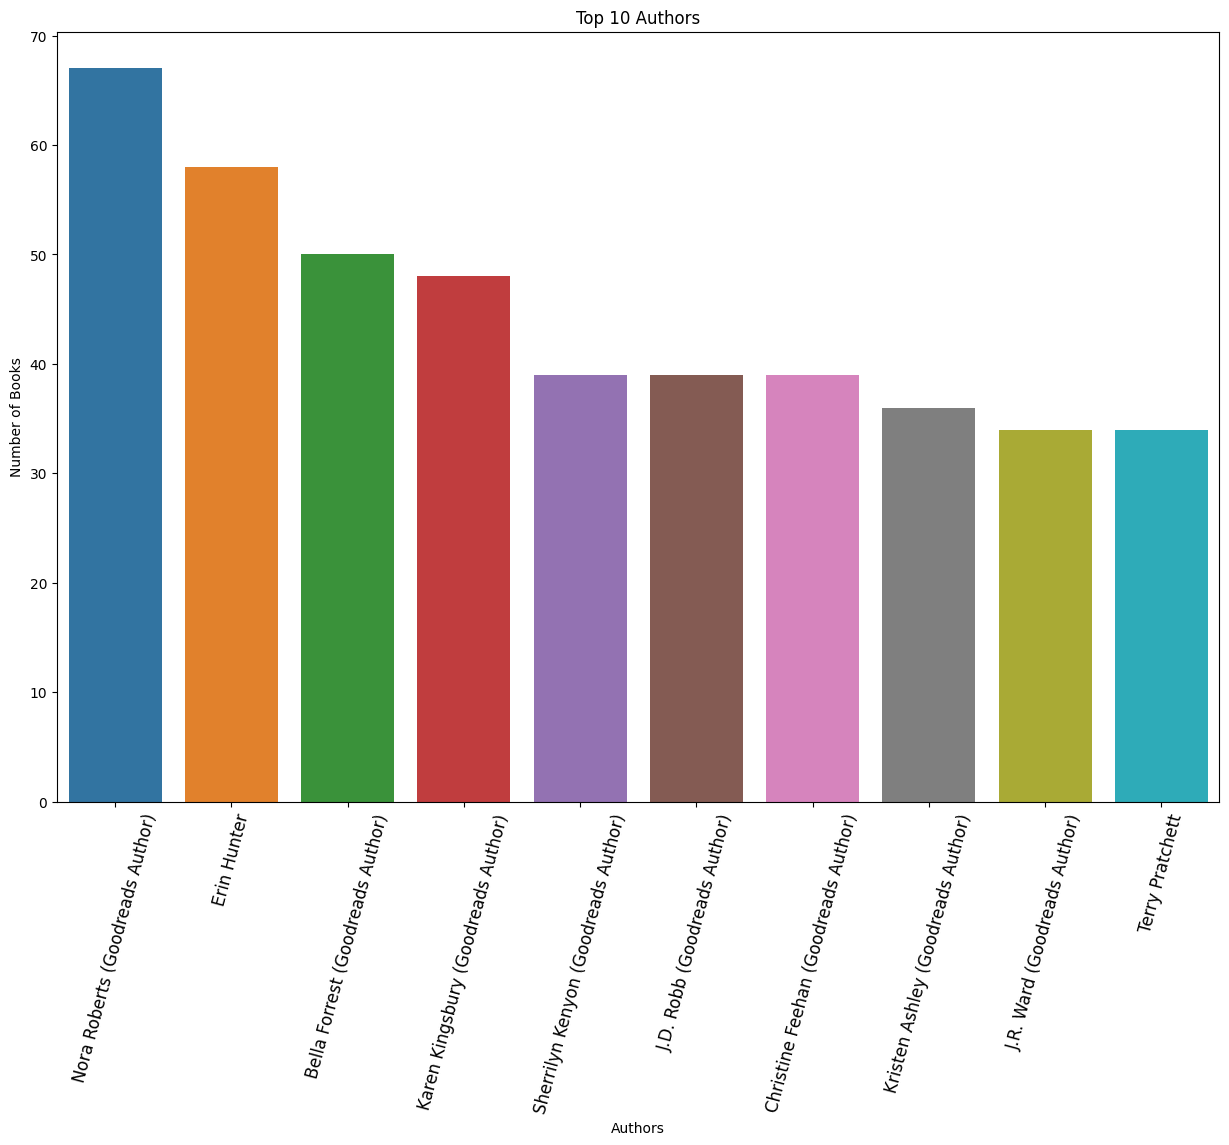

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x= 'author',data=df1,order=df1['author'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors")
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.xticks(rotation=75,fontsize=12)
plt.show()

In [35]:
top_15_publisher = df1.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('publisher')
top_15_publisher.head(15)

,title
publisher,
HarperCollins,316
Vintage,232
Avon,175
Penguin Books,172
Ballantine Books,170
Bantam,169
Del Rey,158
Grand Central Publishing,134
Pocket Books,129


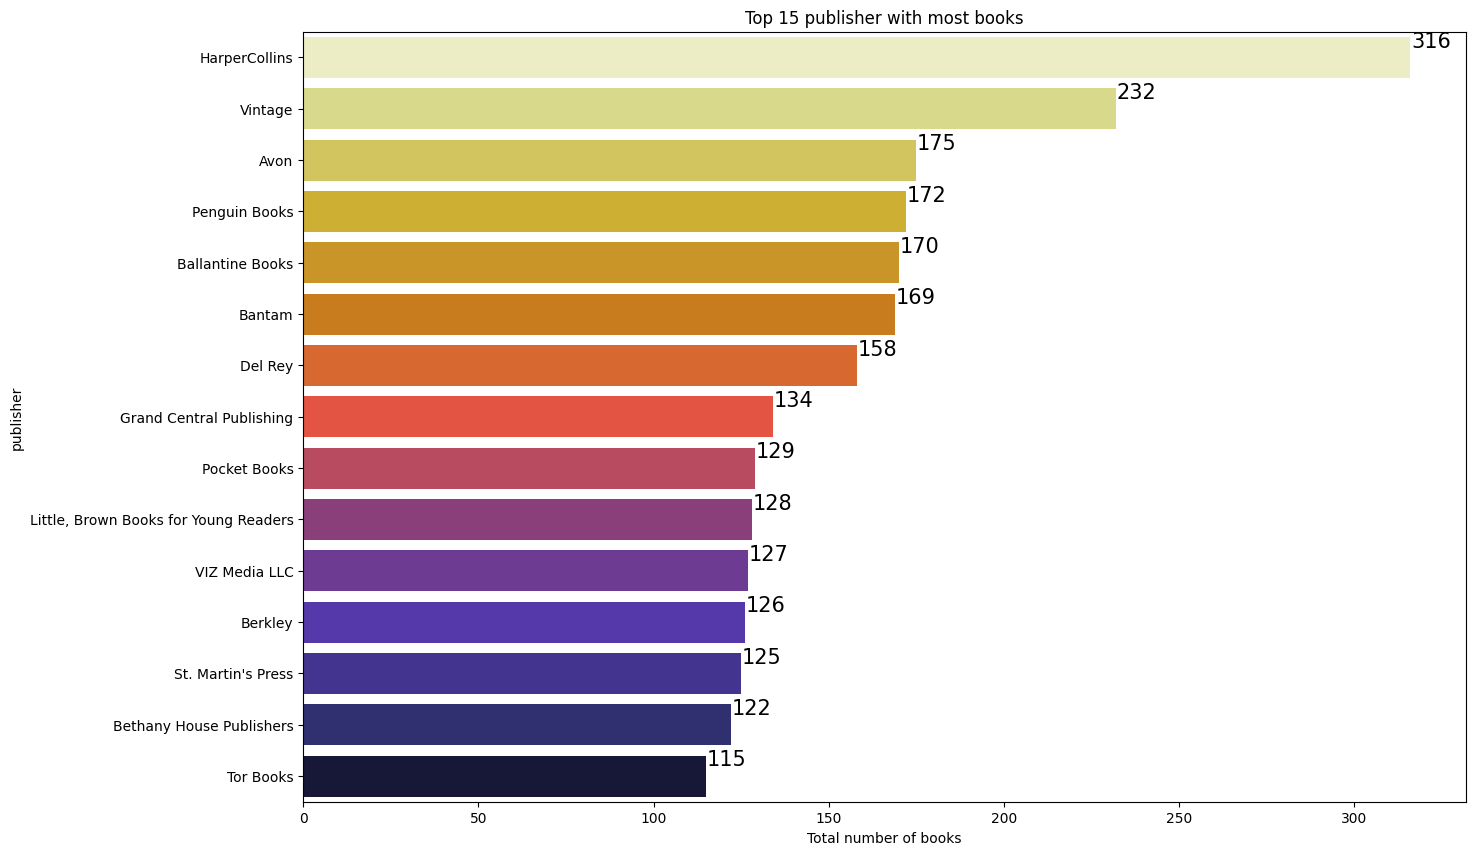

In [36]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=top_15_publisher['title'],y= top_15_publisher.index, palette='CMRmap_r')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

### Popularity Based Recommendation

In [37]:
popular=new_df[new_df['numRatings']>=10000].sort_values('rating',ascending=False).head(10)

In [38]:
popular

,bookId,title,isbn,rating,numRatings,tag
256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,9780740748479,4.82,34893,billwatterson comic humor graphicnovel fiction...
26500,11221285-the-way-of-kings-part-2,"The Way of Kings, Part 2",9780575102484,4.79,13194,brandonsanderson(goodreadsauthor) fantasi fict...
7008,8.Harry_Potter_Boxed_Set_Books_1_5,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",9780439682589,4.78,52749,j.k.rowl marygrandpré(illustrator) fantasi you...
2756,5031805-esv-study-bible,ESV Study Bible,9781433502415,4.78,12868,anonym lanet.dennis(editor) waynegrudem(editor...
2699,95602.Mark_of_the_Lion_Trilogy,Mark of the Lion Trilogy,9780842339520,4.77,11402,francinerivers(goodreadsauthor) christianfict ...
5564,24814.It_s_a_Magical_World,It's a Magical World,9780836221367,4.76,25874,billwatterson comic humor graphicnovel fiction...
14496,70489.There_s_Treasure_Everywhere,There's Treasure Everywhere,9780836213126,4.75,19726,billwatterson comic humor fiction graphicnovel...
635,17332218-words-of-radiance,Words of Radiance,9780765326362,4.75,207369,brandonsanderson(goodreadsauthor) fantasi fict...
3582,24815.The_Indispensable_Calvin_and_Hobbes,The Indispensable Calvin and Hobbes,9780751500288,4.74,19492,billwatterson comic humor fiction graphicnovel...
1565,59715.The_Authoritative_Calvin_and_Hobbes,The Authoritative Calvin and Hobbes: A Calvin ...,9780751507959,4.74,20857,billwatterson comic humor graphicnovel fiction...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_908\1061937486.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


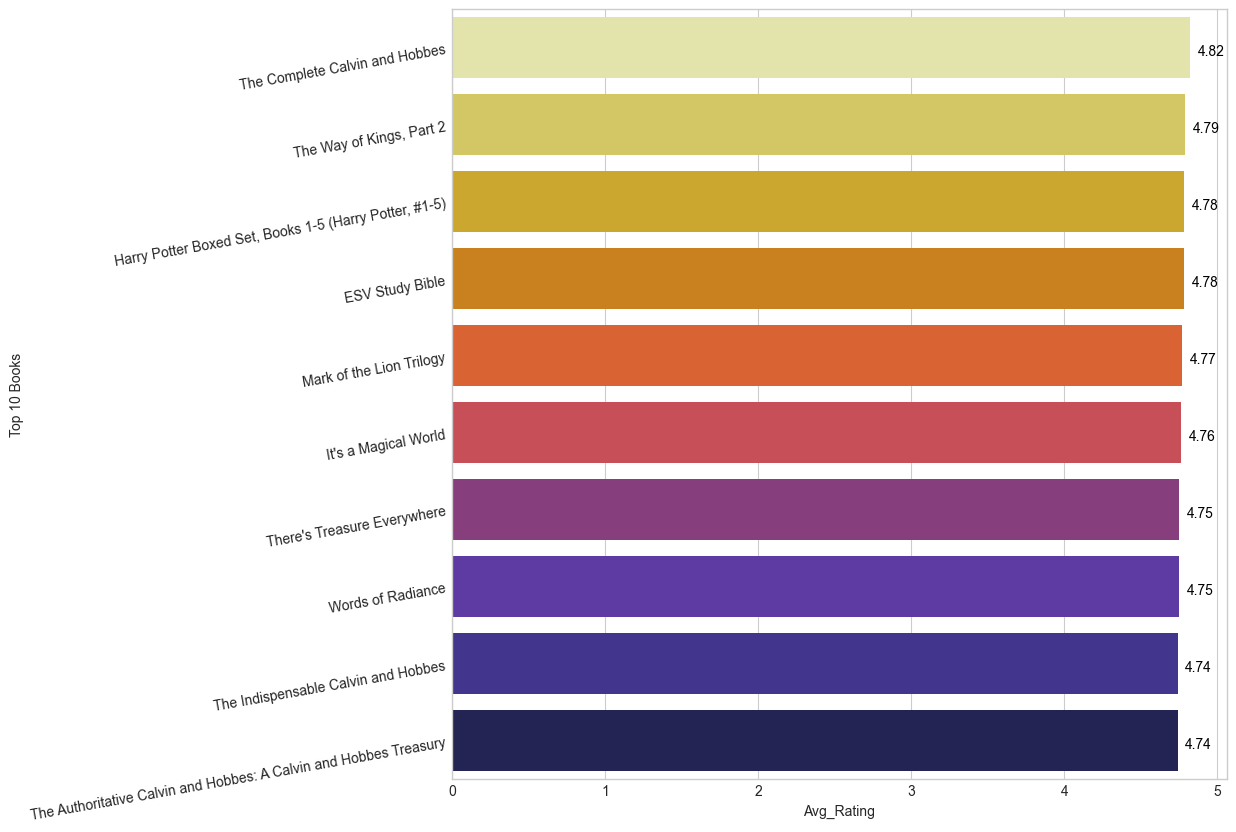

In [39]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))

data = popular.sort_values(by='rating', ascending=False).head(10)
gr = sns.barplot(x=data['rating'], y="title", data=data, palette="CMRmap_r")
plt.xlabel('Avg_Rating')
plt.ylabel("Top 10 Books")
plt.yticks(rotation=10)
for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

### Content Base Recommendation

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500,stop_words='english')

In [41]:
new_df=new_df.reset_index()
vectors=cv.fit_transform(new_df['tag']).toarray()
new_df.shape

(18894, 7)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
similarity=cosine_similarity(vectors)
# similarity=model_knn.fit(vectors)

In [44]:
def recommend(book):
    book_index=new_df[new_df['title']==book].index[0]
    distance=similarity[book_index]
    book_list=sorted(list(enumerate(distance)),reverse=True ,key=lambda x:x[1])[1:11]
    for i in book_list:
        print(new_df.iloc[i[0]].title)

In [45]:
recommend('Chasing Fire')
new_df

Honest Illusions
Black Hills
Seduzido até Domingo
Il bugiardo
Chesapeake Blue
Inner Harbor
Montana Sky
Public Secrets
Hidden Riches
Angels Fall


,index,bookId,title,isbn,rating,numRatings,tag
0,43462,33649894-keeper-of-the-lost-cities-set,Keeper of the Lost Cities Set,B01FZFVDJG,4.88,694,shannonmessenger(goodreadsauthor) fantasi aladdin
1,7737,24885561-keeper-of-the-lost-cities-exile-everb...,Keeper of the Lost Cities / Exile / Everblaze,9781481451123,4.86,861,shannonmessenger(goodreadsauthor) fantasi midd...
2,256,24812.The_Complete_Calvin_and_Hobbes,The Complete Calvin and Hobbes,9780740748479,4.82,34893,billwatterson comic humor graphicnovel fiction...
3,32605,26112217-wings-of-fire-boxset-books-1-5,"Wings of Fire Boxset, Books 1-5",9780545855723,4.81,600,tuit.sutherland beareiter(translator) fantasi ...
4,35525,52853690-wings-of-fire-boxset,Wings of Fire Boxset: Books #6-10,9781338598896,4.80,588,scholasticinc(contributor) scholasticpress
...,...,...,...,...,...,...,...
18889,28956,7465733-sila-nerangalil-sila-manithargal,சில நேரங்களில் சில மனிதர்கள் [Sila Nerangalil ...,B00JXG2GS6,3.99,2108,jayakanthan fiction novel india mmromanc மீனாட...
18890,35196,47528.Hexwood,Hexwood,9780064473552,3.99,4054,dianawynnejon fantasi youngadult fiction scien...
18891,4006,3338544,رحلتي من الشك إلى الإيمان,9999999999999,3.99,21345,مصطفىمحمود religion nonfict philosophi islam b...
18892,38155,12057671-seto-bagh,सेतो बाघ [Seto Bagh],9789993307815,3.99,664,diamondshumsherrana डायमनशमशेरराणा histori his...


### Collaborative Filtering Based Recommender

In [46]:

df2.columns
df2=df2.drop(['Year-Of-Publication','Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)
rating_with_name=ratings.merge(df2, on='ISBN')

In [47]:
rating_with_name = rating_with_name.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (rating_with_name.
    groupby(by = ['Book-Title'])['Book-Rating'].
    count().
    reset_index().
    rename(columns = {'Book-Rating': 'totalRatingCount'})
    [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [48]:
rating_with_totalRatingCount = rating_with_name.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60


In [49]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,60


In [50]:
combined = rating_popular_book.merge(user, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("india|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount,Location
73,24878,0446520802,7,The Notebook,Nicholas Sparks,Warner Books,650,"ottawa, ontario, canada"
75,27617,0446520802,9,The Notebook,Nicholas Sparks,Warner Books,650,"beaverton, ontario, canada"
76,28204,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"south ohio, nova scotia, canada"
121,157823,0446520802,10,The Notebook,Nicholas Sparks,Warner Books,650,"guelph, ontario, canada"
133,188010,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"edmonton, alberta, canada"
134,190374,0446520802,8,The Notebook,Nicholas Sparks,Warner Books,650,"kamloops, british columbia, canada"
138,200226,0446520802,9,The Notebook,Nicholas Sparks,Warner Books,650,"burlington, ontario, canada"
144,208829,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"fredericton, new brunswick, canada"
199,31315,038550120X,6,A Painted House,JOHN GRISHAM,Doubleday,838,"henryville, indiana, usa"
214,41841,038550120X,0,A Painted House,JOHN GRISHAM,Doubleday,838,"sherwood park, alberta, canada"


### Model Building

In [51]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values ='Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)







In [52]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)
# print(us_canada_user_rating_pivot.index[query_index])


for i in range(0,6):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        

754
Recommendations for Grave Secrets (Temperance Brennan Novel (Hardcover)):

1: L Is for Lawless
2: Tailchaser's Song
3: He Sees You When You're Sleeping : A Novel
4: Bare Bones : A Novel
5: The Mammoth Hunters (Earth's Children (Paperback))


In [54]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
query_index

1812

In [55]:
us_canada_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,totalRatingCount,Location
73,24878,0446520802,7,The Notebook,Nicholas Sparks,Warner Books,650,"ottawa, ontario, canada"
75,27617,0446520802,9,The Notebook,Nicholas Sparks,Warner Books,650,"beaverton, ontario, canada"
76,28204,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"south ohio, nova scotia, canada"
121,157823,0446520802,10,The Notebook,Nicholas Sparks,Warner Books,650,"guelph, ontario, canada"
133,188010,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,650,"edmonton, alberta, canada"
...,...,...,...,...,...,...,...,...
288686,259901,0395647398,10,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,Houghton Mifflin,260,"thompson, manitoba, canada"
288694,271476,0445046562,7,Thursday's Child,Victoria Poole,Warner Books,56,"thorold, ontario, canada"
288700,263877,0451211081,0,A Day Late and a Dollar Short,Terry McMillan,New American Library,116,"victoria, british columbia, canada"
288701,263877,0613335864,0,False Memory,Dean Koontz,Sagebrush Bound,227,"victoria, british columbia, canada"


In [56]:
us_canada_user_rating_pivot

User-ID,8,77,193,232,422,645,790,938,1011,1048,...,278361,278409,278483,278541,278556,278641,278672,278732,278786,278846
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
distances, indices

(array([[2.22044605e-16, 5.63568534e-01, 6.24760613e-01, 6.24760613e-01,
         6.24760613e-01, 6.26381405e-01]]),
 array([[2013, 1694,  647, 2152,  207,  298]], dtype=int64))